In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Exploracion de datos



In [2]:
ds_ingenieria = pd.read_csv("./dataset_ingenieria.csv", delimiter=";")
ds_ingreso    = pd.read_csv("./dataset_ingreso.csv", delimiter=";")

In [3]:
ds_ingenieria.head(10)

,Estudiante,Asignatura,Equivalente,Año,Semestre,Concepto,Calificación,Carrera,Situación,
0,IDALU120,DYRE070-14,,2016,1,RECONOCIDA,0,Ingenieria,A,
1,IDALU120,BAIN075-14,,2016,1,RECONOCIDA,4,Ingenieria,A,
2,IDALU120,BAIN081-14,,2016,1,RECONOCIDA,4,Ingenieria,A,
3,IDALU120,BAIN083-14,,2016,1,RECONOCIDA,4,Ingenieria,A,
4,IDALU120,BAIN065-14,,2016,1,RECONOCIDA,"4,1",Ingenieria,A,
5,IDALU120,BAIN067-14,,2016,1,RECONOCIDA,"4,1",Ingenieria,A,
6,IDALU120,BAIN069-14,,2016,1,RECONOCIDA,"4,3",Ingenieria,A,
7,IDALU120,BAIN077-14,,2016,1,RECONOCIDA,"4,4",Ingenieria,A,
8,IDALU120,BAIN085-14,,2016,1,RECONOCIDA,"4,5",Ingenieria,A,
9,IDALU120,BAIN071-14,,2016,1,RECONOCIDA,5,Ingenieria,A,


In [4]:
ds_ingreso.head()

,Estudiante,Año
0,IDALU120,2016
1,IDALU245,2011
2,IDALU372,2016
3,IDALU694,2011
4,IDALU695,2011


In [5]:
np.unique(ds_ingenieria["Situación"])

array(['A', 'N', 'R'], dtype=object)

Cual es el semestre mas dificil?

In [6]:
np.unique(ds_ingenieria['Semestre'], return_counts=True)

(array([1, 2]), array([6430, 5185]))

In [7]:
np.unique(ds_ingenieria['Semestre'][ds_ingenieria['Situación']=='A'], return_counts=True)

(array([1, 2]), array([4711, 3473]))

In [8]:
np.max(ds_ingenieria['Año'])

2017

In [9]:
np.unique(ds_ingreso['Año'], return_counts=True)

(array([2011, 2012, 2013, 2014, 2015, 2016, 2017]),
 array([156,  41,  59,  56,  53,  62,  52]))

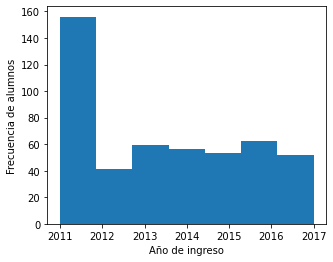

In [10]:
f, ax = plt.subplots(figsize=(5,4), facecolor='w')
ax.hist(ds_ingreso['Año'], bins=7)
ax.set_xlabel("Año de ingreso")
ax.set_ylabel("Frecuencia de alumnos")
plt.savefig("Histograma_alumnos_año.pdf", bbox_inches = "tight")

# TODO: Add this plot to the article

In [11]:
estudiantes_2011 = ds_ingreso['Estudiante'][ds_ingreso['Año']==2011].to_numpy()
(estudiantes_2011).shape

(156,)

In [12]:
n_estudiantes_2011 = (estudiantes_2011).shape[0]
n_anios = 7

matrix_situacion_A = np.zeros(shape=(n_estudiantes_2011, n_anios))
matrix_situacion_R = np.zeros(shape=(n_estudiantes_2011, n_anios))
matrix_situacion_N = np.zeros(shape=(n_estudiantes_2011, n_anios))

for i in range(n_estudiantes_2011):
  #tmp_estudiante = estudiantes_2011[i]
  cond1 = ds_ingenieria['Estudiante'] == estudiantes_2011[i]
  cond2A = ds_ingenieria['Situación'] == 'A'
  cond2R = ds_ingenieria['Situación'] == 'R'
  cond2N = ds_ingenieria['Situación'] == 'N'
  for j in range(n_anios):
    cond3 = ds_ingenieria['Año'] == 2011+j

    merge_conds = cond1 & cond2A & cond3
    matrix_situacion_A[i, j] += np.sum(merge_conds)
    merge_conds = cond1 & cond2R & cond3
    matrix_situacion_R[i, j] += np.sum(merge_conds)
    merge_conds = cond1 & cond2N & cond3
    matrix_situacion_N[i, j] += np.sum(merge_conds)
    #print( 2011+j, estudiantes_2011[i], np.sum(merge_conds))
  #print(matrix_situacion_A[i, :])
  #if i > 5:
  #  break

In [13]:
print(matrix_situacion_A[:10, :])
print(matrix_situacion_R[:10, :])
print(matrix_situacion_N[:10, :])

[[ 3.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 7.  0.  0.  0.  0.  0.  0.]
 [11.  1.  0.  0.  0.  0.  0.]
 [ 7.  5.  3.  7.  3.  2.  1.]
 [ 8.  4.  0.  0.  0.  0.  0.]
 [ 2.  3.  1.  0.  0.  0.  0.]
 [ 8.  4.  7.  7.  3.  0.  0.]
 [ 6.  7.  7.  3.  0.  0.  0.]
 [ 9.  6.  7.  7.  3.  0.  0.]]
[[4. 6. 3. 0. 0. 0. 0.]
 [7. 7. 0. 0. 0. 0. 0.]
 [4. 0. 0. 0. 0. 0. 0.]
 [1. 6. 0. 0. 0. 0. 0.]
 [4. 4. 4. 3. 1. 4. 2.]
 [4. 3. 0. 0. 0. 0. 0.]
 [6. 4. 4. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0.]
 [0. 3. 0. 0. 0. 0. 0.]
 [0. 3. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [14]:
si = np.argsort(np.sum(matrix_situacion_A.T, axis=0))[::-1]

In [15]:
fs_labels = 14

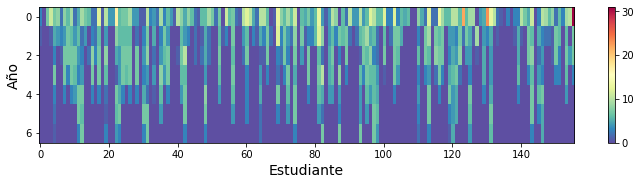

In [16]:
plt.figure(figsize=(12,2.5))
plt.imshow(matrix_situacion_A.T, aspect='auto', cmap='Spectral_r')
plt.colorbar()
plt.xlabel("Estudiante", fontsize=fs_labels)
plt.ylabel("Año", fontsize=fs_labels)
plt.savefig("Spectral_alumnos_año_desordenado.pdf", bbox_inches = "tight")

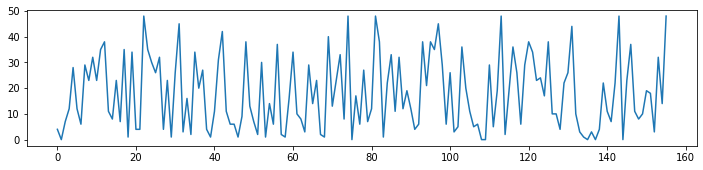

In [17]:
plt.figure(figsize=(12,2.5)); plt.plot(np.sum(matrix_situacion_A.T, axis=0))

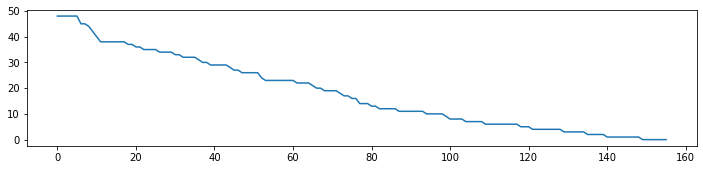

In [18]:
plt.figure(figsize=(12,2.5)); plt.plot(np.sum(matrix_situacion_A.T[:,si], axis=0))

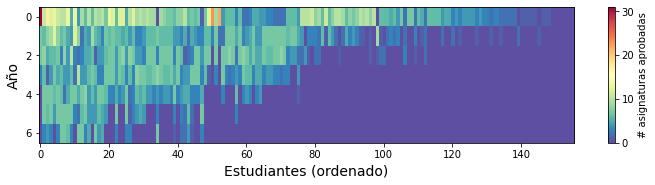

In [19]:
plt.figure(figsize=(12,2.5))
#plt.plot(grid=False)
plt.imshow(matrix_situacion_A.T[:,si], aspect='auto', cmap='Spectral_r')
cbar = plt.colorbar()
plt.xlabel("Estudiantes (ordenado)", fontsize=fs_labels)
plt.ylabel("Año", fontsize=fs_labels)
cbar.set_label("# asignaturas aprobadas")
plt.savefig("Spectral_alumnos_año_ordenado.pdf", bbox_inches = "tight")

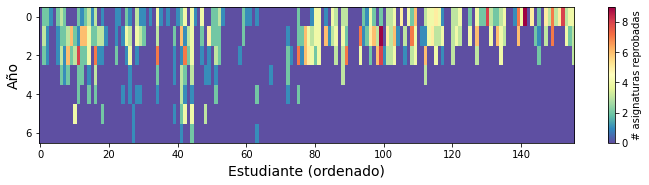

In [20]:
plt.figure(figsize=(12,2.5))
plt.imshow(matrix_situacion_R.T[:,si], aspect='auto', cmap='Spectral_r')
cbar = plt.colorbar()
plt.xlabel("Estudiante (ordenado)", fontsize=fs_labels)
plt.ylabel("Año", fontsize=fs_labels)
cbar.set_label("# asignaturas reprobadas")
plt.savefig("Spectral_reprobados_alumnos_año_ordenado.pdf", bbox_inches = "tight")

In [21]:
np.sum((matrix_situacion_R.T[0,si] == 0) & (matrix_situacion_R.T[1,si] == 0))

43

## Feature Selection

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
feature_cols = ["R_A1", "R_A2"] #, "std(R_A1-R_A2)"]
X = np.array([
    matrix_situacion_R.T[0, si],
    matrix_situacion_R.T[1, si],
    #np.std(np.abs(np.diff(matrix_situacion_R.T[:2,si]),axis=1), axis=0),       
])

In [33]:
matrix_situacion_R.T[1, si].shape, np.std(np.abs(np.diff(matrix_situacion_R.T[:2,si])), axis=0).shape

((156,), (155,))

In [34]:
termino_carrera = np.array([ 1 if item > 0 else 0 for item in matrix_situacion_A.T[-1,si] ])

In [35]:
y = termino_carrera # matrix_situacion_A.T[-1,si]

In [36]:
from sklearn.model_selection import train_test_split

## Splitting Data

In [37]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X.T, y, test_size=0.3, random_state=1
    ) # 70% training and 30% test


## Building Decision Tree Model

In [38]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [39]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [40]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Evaluating Model

In [41]:
from sklearn import metrics

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8085106382978723


## Visualizing Decision Trees

In [44]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

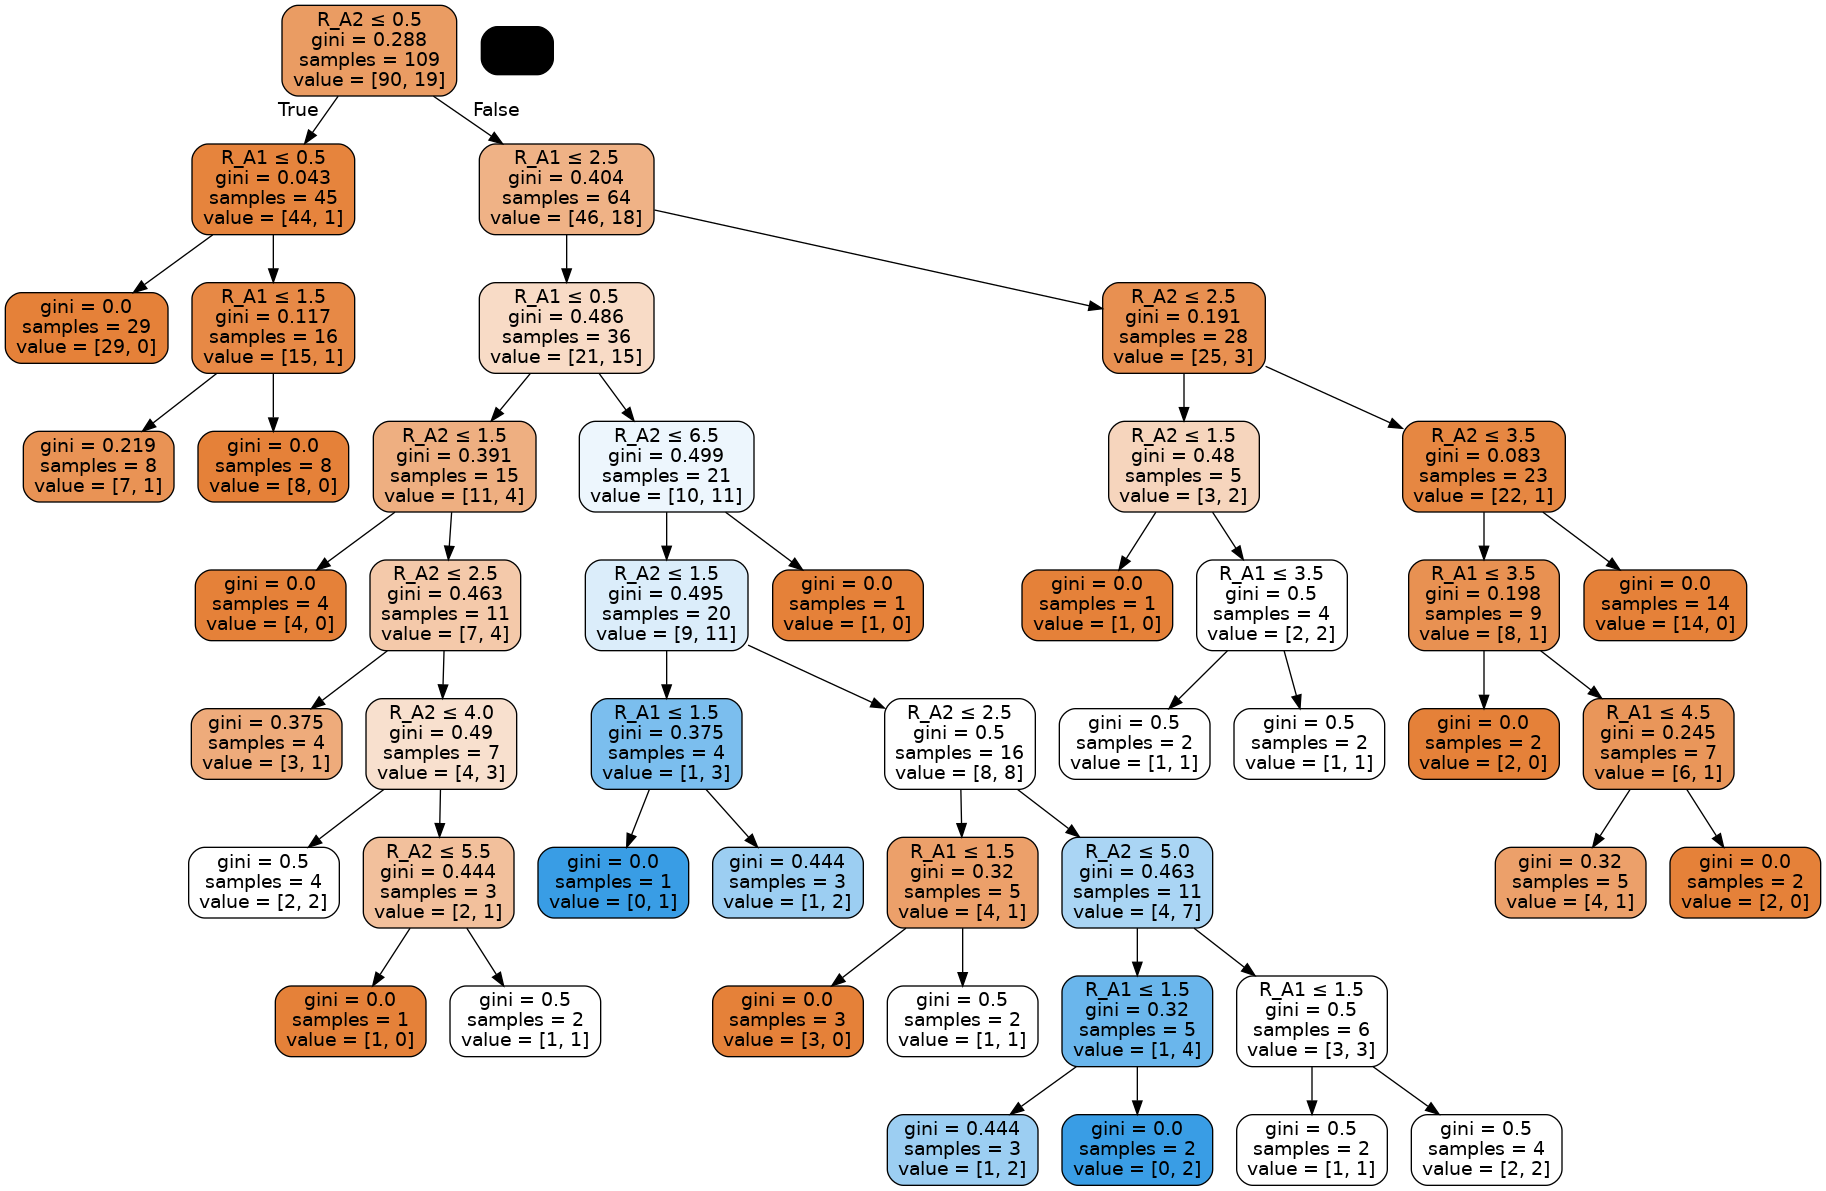

In [45]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols#, class_names=['0','1']
                )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('desercion.png')
Image(graph.create_png())

In [46]:
X_test[:,0], y_test

(array([1., 2., 2., 0., 1., 1., 3., 6., 1., 0., 3., 0., 0., 0., 3., 2., 0.,
        3., 0., 1., 0., 5., 0., 2., 0., 0., 2., 4., 4., 4., 5., 1., 0., 0.,
        9., 2., 4., 3., 3., 2., 0., 3., 0., 0., 0., 0., 0.]),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0]))

In [47]:
# src: https://www.datacamp.com/tutorial/decision-tree-classification-python

# Optimizing classifier

In [48]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [49]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [50]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Evaluating Model

In [51]:
from sklearn import metrics

In [52]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.723404255319149


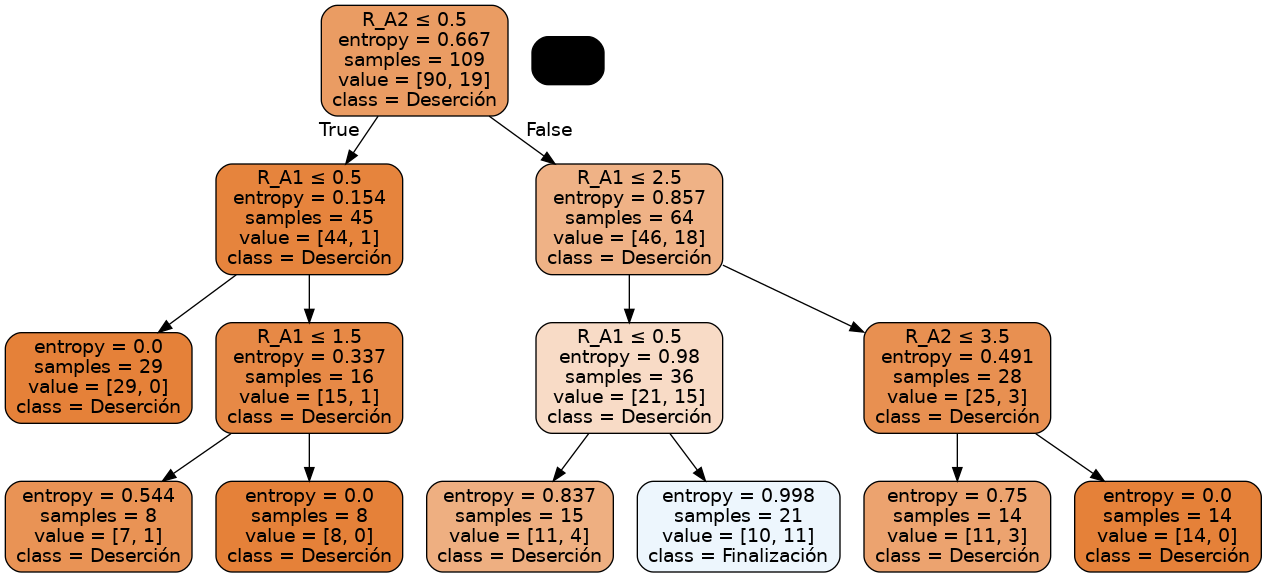

In [53]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Deserción','Finalización'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('desercion_2.png')
Image(graph.create_png())

Conclusions:
About Decision trees:

Pros

    Decision trees are easy to interpret and visualize.
    It can easily capture Non-linear patterns.
    It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
    It can be used for feature engineering such as predicting missing values, suitable for variable selection.
    The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. (Source)

Cons

    Sensitive to noisy data. It can overfit noisy data.
    The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
    Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.


https://www.datacamp.com/tutorial/decision-tree-classification-python

---

In [54]:
from sklearn.metrics import confusion_matrix

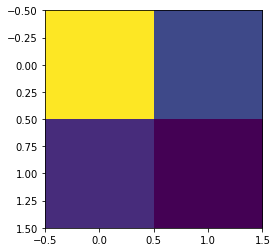

In [55]:
plt.imshow(confusion_matrix(y_test, y_pred))

In [56]:
import seaborn as sn # se ejecuta aqui para no dañar la visual de los plots previos.

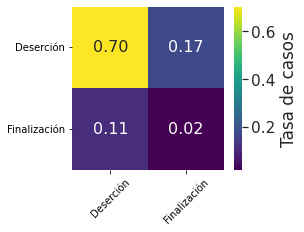

In [58]:
conf = confusion_matrix(y_test, y_pred, normalize='all')
#conf = conf / np.sum(conf)
df_cm = pd.DataFrame(conf)#, columns=["Deserción","Finalización"])#, rows=["X","Y"])
f, ax = plt.subplots(figsize = (3.4,3), facecolor='w')
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='.2f', annot_kws={"size": 16}, cmap="viridis", cbar_kws={'label': 'Tasa de casos'})#['','Finalización'])
ax.set_yticklabels(["Deserción","Finalización"], rotation=0)
ax.set_xticklabels(["Deserción","Finalización"], rotation=45)
plt.savefig('confusion_matrix.png', bbox_inches = "tight")
#plt.savefig("Spectral_reprobados_alumnos_año_ordenado.pdf", bbox_inches = "tight")
#sn.set_xticklabel("asd")

Trabajo futuro:
+ Mejorar prediciones. Como?
  1) clases no estan balanceadas: no existe la misma cantidad de estudiantes que finalizaron sus estudios con los que viraron. Opciones de mejora podrian ser analizando un corpus mayor, o usando boostrapping, o creando datasets balanceados de forma aleatoria.
+ Probar otros metodos de clasificacion. (googlear por otros).
